# Assignment - 1: Solution
#### (Intermediate - Advanced)

This is the first assignment of DPhi 5 Week Data Science Bootcamp that revolves aroung Data Analysis and Visualizations on Learners dataset of the Bootcamp.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
learners_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/DPhi%20-%20Learners%20-%20Beginners%20%26%20Absolute%20Beginners%20-%20Real%20Dataset%20-%20DPhi_Learners.csv")

#### Question 1: Fill all the missing values with 0. (Treat '-' as missing values)               

In [ ]:
def f(r):
    if r == '-':
        return 0
    else:
        return r
    
for cols in learners_data.columns:
    learners_data[cols] = learners_data[cols].apply(f)     # Using apply, we are applying the function f to every column in the dataset. 

In [ ]:
# Since all the columns are categorical, need to convert quiz scores into numerical
cols = ['Quiz1','Quiz2','Quiz3','Quiz4','Quiz5','Quiz6','Quiz7','Total_Score']    
learners_data[cols] = learners_data[cols].astype('float64')    #  astype helps us convert the data type to float

#### Question 2: Visualize learners category with different groups and notedown your inferences.    



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**One of the possible outputs could be like below**

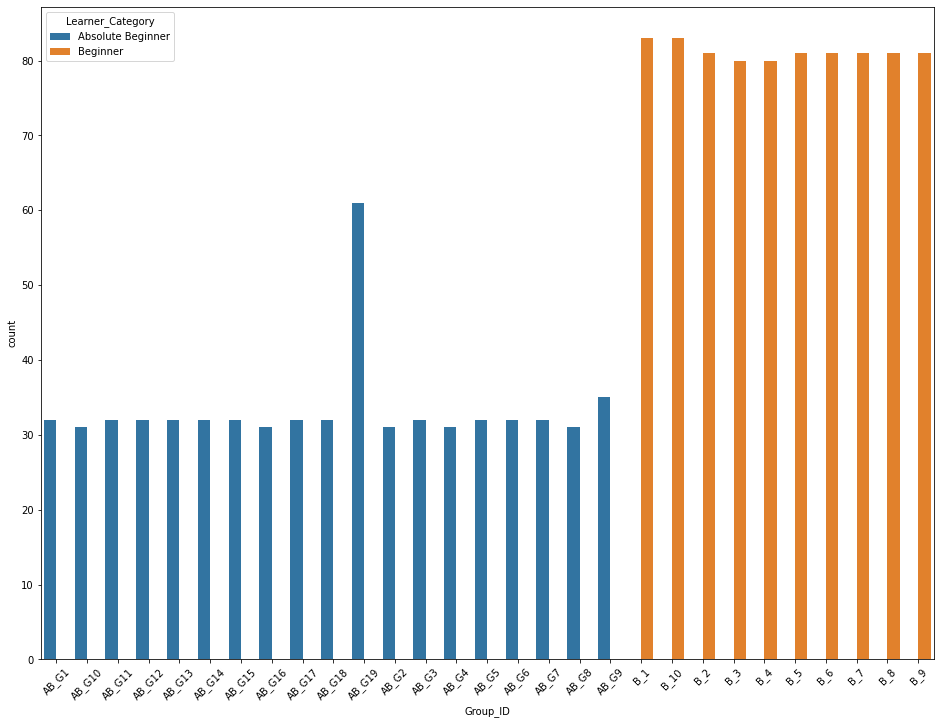

In [ ]:
plt.figure(figsize=(16,12))
count_plot = sns.countplot(learners_data.Group_ID, hue=learners_data.Learner_Category)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)  # we have specified rotation just so that the ticks are more readable
plt.show()

In [ ]:
# Inferences
* All the groups of absolute beginners learning category have members in between 30 and 35 except AB_G19.
* Group AB_G19 of absolute beginners learning category have more than 60 members.
* All the groups of beginner learning category have members 80 or more.
* There are more members associated with beginners learning track than absolute beginners learning track 
Approximate calculation:
    absolute beginners : 19 (total # of groups in AB) * 30 (approx members) = 570
    beginners : 10 (total # of groups in B) * 80 (approx members) = 800

SyntaxError: ignored

#### Question 3: Visualize the distribution of Total_Scores scored by each category of learners and share your inferences.
    Ignore those whose marks are near to zero as 0 was filled by us. 

 

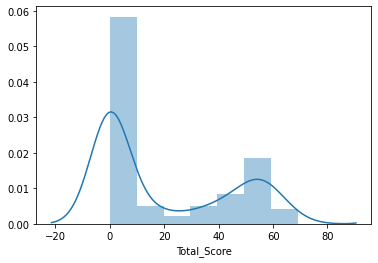

In [ ]:
sns.distplot(learners_data[learners_data['Learner_Category'] == 'Absolute Beginner']['Total_Score'])  # Conditional selection
# we are selecting only those entries where the Learner_Category is Absolute Beginners. Out of those rows, we are selecting only Total_Score values

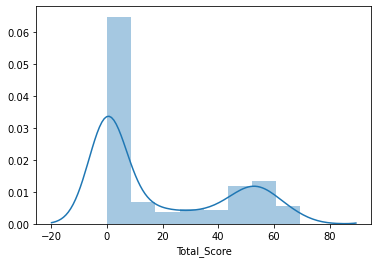

In [ ]:
sns.distplot(learners_data[learners_data['Learner_Category'] == 'Beginner']['Total_Score'])

In [ ]:
# Inferences
* The distribution of total scores scored by both the learning category are similar.
* Maximum people scores lie in the range 45 to 60 for beginners category.

#### Question 4: Visualize/draw the trends of quizzes mean scores for different groups of learners of learner category absolute beginner.


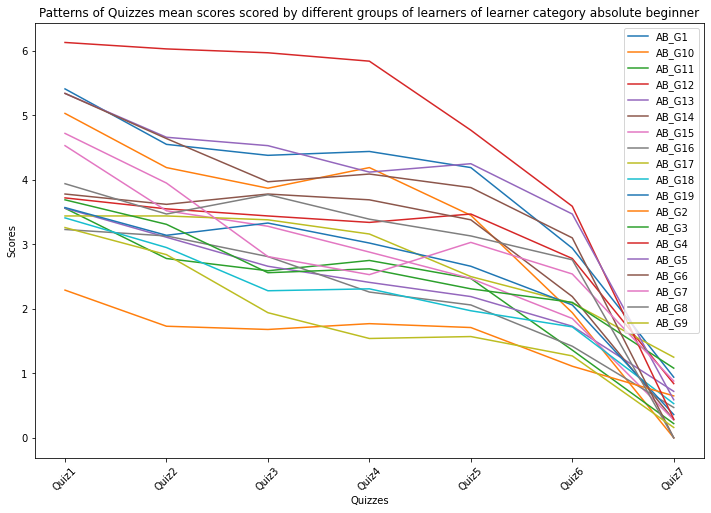

In [ ]:
learners_data_grouped = learners_data.groupby(learners_data['Group_ID']).mean().round(2)   # Group by different groups and taking the mean of each group upto 2 decimal places
learners_data_grouped.drop(columns = ['Total_Score'], axis = 1, inplace = True)  #dropping the total score as we want to visualise group-wise mean score of each quiz
learners_data_grouped_axes_swapped = learners_data_grouped.swapaxes('index','columns')   # swap the axes (this step can be skipped as well)

# Plotting the trends of quizzes mean scores scored by different groups of learners.
plt.figure(figsize=(12,8))
x = ["Quiz1", "Quiz2", "Quiz3", "Quiz4", "Quiz5", "Quiz6", "Quiz7"]  # Quizzes 
for col in learners_data_grouped_axes_swapped.columns[:19]:
    plt.plot(x, learners_data_grouped_axes_swapped[col])   #plotting each line graph in one image using a for loop
    
plt.xlabel('Quizzes')
plt.ylabel('Scores')
plt.title("Patterns of Quizzes mean scores scored by different groups of learners of learner category absolute beginner")
plt.xticks(rotation=45) #just for better visibility
plt.legend(learners_data_grouped_axes_swapped.columns[:19]) # showing the first 19 columns in legend (all the abs beginner category groups)
plt.show()

#### Question 5: Question 4: Visualize/draw the trends of quizzes mean scores for different groups of learners of learner category beginner.

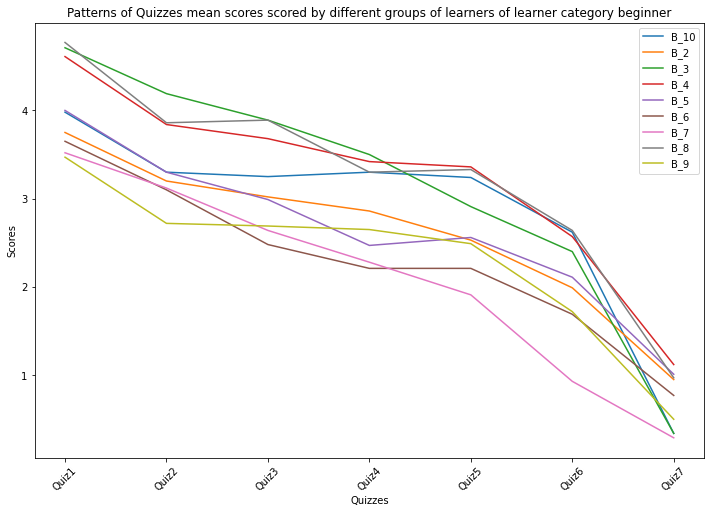

In [ ]:
# Plotting the trends of quizzes mean scores scored by different groups of learners.
plt.figure(figsize=(12,8))
x = ["Quiz1", "Quiz2", "Quiz3", "Quiz4", "Quiz5", "Quiz6", "Quiz7"]  # Quizzes and total scores
for col in learners_data_grouped_axes_swapped.columns[20:]:
    plt.plot(x, learners_data_grouped_axes_swapped[col])
    
plt.xlabel('Quizzes')
plt.ylabel('Scores')
plt.title("Patterns of Quizzes mean scores scored by different groups of learners of learner category beginner")
plt.xticks(rotation=45)
plt.legend(learners_data_grouped_axes_swapped.columns[20:])
plt.show()